# Hit-Generation by Fragment-Based Molecular Optimization

In [1]:
from optimizer import MolecularOptimizer
from library import Library
from genmol import GenMol_Generator
from oracle import Oracle

import pandas as pd

## Library

#### Read molecular library of FDA-approved drugs with 20~30 heavy atoms 

In [2]:
mol_library = pd.read_csv('./fda_drugs.csv')
mol_library

,Unnamed: 0,ChEMBL ID,Name,Smiles,Molecular Weight,Bioactivities,AlogP,Polar Surface Area,HBA,HBD,QED Weighted,Heavy Atoms,Aromatic Rings,Np Likeness Score
0,1,CHEMBL1200385,ARBUTAMINE HYDROCHLORIDE,Cl.Oc1ccc(CCCCNC[C@H](O)c2ccc(O)c(O)c2)cc1,353.85,NaN,2.45,92.95,5,5,0.38,23,2,0.46
1,2,CHEMBL27810,CELIPROLOL,CCN(CC)C(=O)Nc1ccc(OCC(O)CNC(C)(C)C)c(C(C)=O)c1,379.50,94.0,2.89,90.90,5,3,0.57,27,1,-1.22
2,5,CHEMBL1204187,GEPIRONE HYDROCHLORIDE,CC1(C)CC(=O)N(CCCCN2CCN(c3ncccn3)CC2)C(=O)C1.Cl,395.94,9.0,1.55,69.64,6,0,0.57,26,1,-1.31
3,7,CHEMBL1200464,PROPARACAINE HYDROCHLORIDE,CCCOc1ccc(C(=O)OCCN(CC)CC)cc1N.Cl,330.86,26.0,2.56,64.79,5,1,0.56,21,1,-0.94
4,9,CHEMBL2104771,REPROTEROL HYDROCHLORIDE,Cl.Cn1c(=O)c2c(ncn2CCCNCC(O)c2cc(O)cc(O)c2)n(C...,425.87,NaN,-0.44,134.54,10,4,0.40,28,3,-0.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,948,CHEMBL1237,LISINOPRIL ANHYDROUS,NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CC...,405.50,863.0,1.24,132.96,5,4,0.38,29,1,0.20
324,951,CHEMBL1477036,DOCUSATE,CCCCC(CC)COC(=O)CC(C(=O)OCC(CC)CCCC)S(=O)(=O)O,422.58,41.0,4.15,106.97,6,1,0.29,28,0,0.50
325,954,CHEMBL77622,DOPEXAMINE,Oc1ccc(CCNCCCCCCNCCc2ccccc2)cc1O,356.51,89.0,3.62,64.52,4,4,0.33,26,2,0.23
326,956,CHEMBL5315049,SITAGLIPTIN FUMARATE,N[C@@H](CC(=O)N1CCn2c(nnc2C(F)(F)F)C1)Cc1cc(F)...,523.39,NaN,2.02,77.04,5,1,0.62,28,2,-1.40


#### Initiate fragment library from known molecules

In [3]:
library = Library(max_fragments = 1000)

In [4]:
molecules = {r['Smiles']:r['QED Weighted'] for idx, r in mol_library.iterrows()}
library.update(molecules)

In [5]:
library.fragments

,smiles,score
0,[1*]c1ccc(C[C@H](C)[C@H](C)Cc2ccc(O)c(O)c2)cc1O,0.64
1,[1*]c1ccc(C[C@@H](C)[C@@H](C)Cc2ccc(O)c(O)c2)cc1O,0.64
2,[1*]O,0.64
3,[1*]c1ccc(O)c(O)c1,0.64
4,[1*]C[C@H](C)[C@H](C)Cc1ccc(O)c(O)c1,0.64
...,...,...
995,[1*]C1=C(C)NC(C)=C(C(=O)OC)C1c1ccccc1[N+](=O)[O-],0.51
996,[1*]CCCC(=O)O,0.51
997,[1*]CCCCCCC(=O)O,0.51
998,[1*]c1cc2c(cc1CCC)OCO2,0.51


In [6]:
library.export(2)

['c15ccc(C#CC6N)nc1.c16ccc(O)cc1.C35=O.CC4.O34',
 'CC1=C(C)C(=O)C(C9CCCCCC6=O)=C(C)C1=O.c16ccc(N=Nc2ccc7cc2)cc18.c19ccccc1.C5CC(=O)O.C47=O.C8(=O)O.N45']

## Oracle

In [7]:
oracle = Oracle(score = Oracle.RDKitScore('QED'))

In [8]:
oracle.evaluate(['CCS(=O)(=O)N1CC(CC#N)(C2CCOCC2C)C1'])

{'CCS(=O)(=O)N1CC(CC#N)(C2CCOCC2C)C1': 0.7789621497302934}

## Generator

In [9]:
generator = GenMol_Generator(invoke_url = 'http://127.0.0.1:8000/generate')

In [10]:
generator.inference(
    smiles = 'CCS2(=O)(=O).C134CN2C1.C3C#N.[*{10-10}]',
    num_molecules = 5,
    temperature = 1.5,
    noise = 2.0
)

[{'smiles': 'CCS(=O)(=O)N1CC(CC#N)(CC(F)(F)F)C1', 'score': 0.777},
 {'smiles': 'CCS(=O)(=O)N1CC(CC#N)(C2CCCCCC2)C1', 'score': 0.745},
 {'smiles': 'CCS(=O)(=O)N1CC(CC#N)(C(C)CCC#N)C1', 'score': 0.731}]

In [11]:
generator.produce(['CC(NC(=O)C(=O)Nc1ccc(F)c(F)c1F)C(F)COc1cc(CNC(=O)NCc2cccnc2)ccn1'], 1)

['CC(C)[C@@H](C)C(=O)NS(=O)(=O)Cc1ccn[nH]1']

## Optimizer

In [12]:
optimizer = MolecularOptimizer(library = library, oracle = oracle, generator = generator)

In [13]:
data = []

def eval():
    best = library.molecules.score[0]
    mean = library.molecules.head(50)['score'].mean()
    std = library.molecules.head(50)['score'].std()
    print("BEST", best, "MEAN", mean, "STD", std)
    data.append([best, mean, std])

eval()

for i in range(25):
    optimizer.run(iterations = 10, num_mutate = 50)
    eval()

BEST 0.64 MEAN 0.6326 STD 0.008283250865328134
BEST 0.8601014809506895 MEAN 0.6548451874646553 STD 0.06056788141508239
BEST 0.9054237843689569 MEAN 0.6728377827586857 STD 0.0780508011574413
BEST 0.91577881680922 MEAN 0.6943374234167312 STD 0.09330699274657255
BEST 0.9260319544821659 MEAN 0.7174159352062002 STD 0.10196637678993797
BEST 0.9260319544821659 MEAN 0.7266371802349321 STD 0.10123829536028617
BEST 0.9260319544821659 MEAN 0.7395284837441279 STD 0.1003886198769303
BEST 0.9260319544821659 MEAN 0.7557249181890384 STD 0.09703985200774094
BEST 0.9260319544821659 MEAN 0.7859669149146989 STD 0.08812988232064854
BEST 0.9260319544821659 MEAN 0.8005683417789525 STD 0.07898666540023529
BEST 0.9260319544821659 MEAN 0.8139404302669679 STD 0.06706133513803261
BEST 0.9260319544821659 MEAN 0.8186952495650971 STD 0.06186252527402703
BEST 0.9277862460895224 MEAN 0.8307914585962459 STD 0.05523463759686769
BEST 0.9301085144387667 MEAN 0.8386561952363462 STD 0.050525261771957965
BEST 0.9301085144387

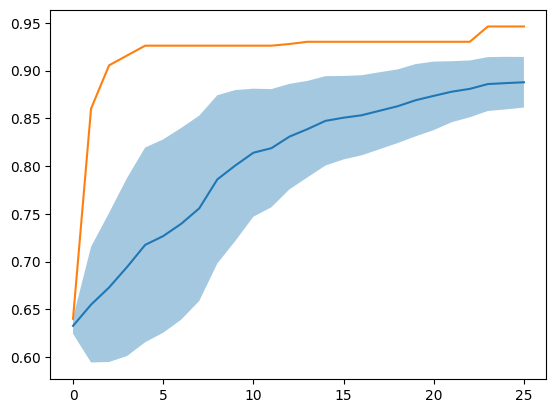

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(data, columns = ['best', 'mean', 'std'])

plt.fill_between(df.index, df['mean']-df['std'], df['mean'] + df['std'], alpha=0.4)
plt.plot(df['mean'])
plt.plot(df['best'])